<a href="https://colab.research.google.com/github/Bala-mani-sankar-dharmavarapu/titanic-survival-prediction/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.8212290502793296


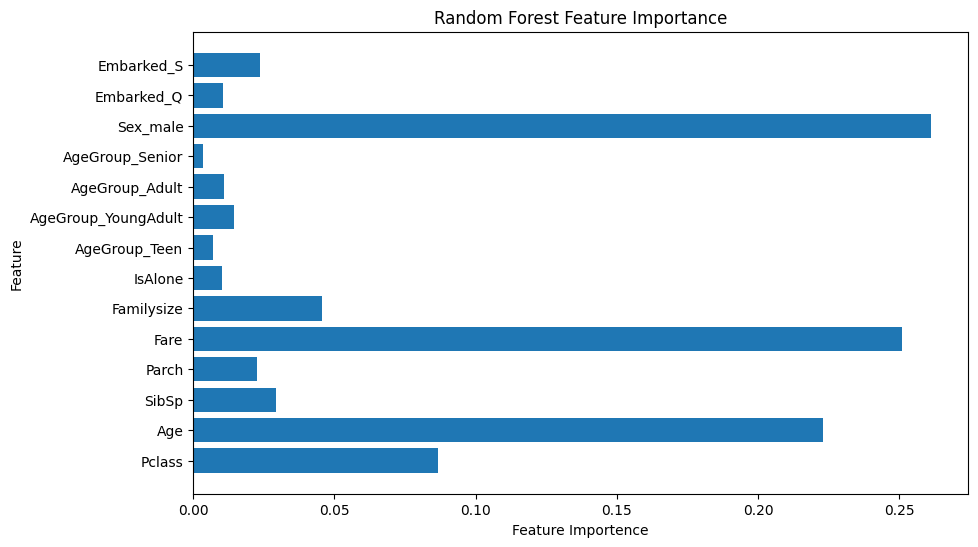

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Cleaning data and filling empty values
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data=data[features + ['Survived']]

data['Age']=data['Age'].fillna(data['Age'].median())
data['Fare']=data['Fare'].fillna(data['Fare'].median())
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

# adding more features to optimize
data["Familysize"]=data["SibSp"] + data["Parch"] + 1
data["IsAlone"]=0
data.loc[data['Familysize']==1, "IsAlone"] = 1
data["AgeGroup"] = pd.cut(data["Age"], bins=[0,12,18,35,60,100],labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])
data=pd.get_dummies(data,columns=["AgeGroup"],drop_first=True)

data=pd.get_dummies(data, columns=['Sex','Embarked'],drop_first=True)

X=data.drop('Survived',axis=1)
Y=data['Survived']

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# train model
model=RandomForestClassifier(random_state=42)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
Accurency=accuracy_score(Y_test,predictions)
print(Accurency)

# Graph
importances = model.feature_importances_
feature_names=X.columns
plt.figure(figsize=(10,6))
plt.barh(feature_names,importances)
plt.xlabel("Feature Importence")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")

plt.show()


